In [ ]:
from google.colab import files


uploaded = files.upload()


Saving Flipkart_mobile_brands_scraped_data.csv to Flipkart_mobile_brands_scraped_data (1).csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df=pd.read_csv(r'Flipkart_mobile_brands_scraped_data.csv')
df.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,NaN,A53,Moonlight Black,4 GB,64 GB,4.5,11990.0,15990.0
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990.0,15990.0
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990.0,17990.0
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990.0,17990.0
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990.0,15990.0


In [ ]:
df.head()
df

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,NaN,A53,Moonlight Black,4 GB,64 GB,4.5,11990.0,15990.0
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990.0,15990.0
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990.0,17990.0
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990.0,17990.0
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990.0,15990.0
...,...,...,...,...,...,...,...,...
2642,Xiaomi,Redmi Y3,Bold Red,4 GB,64 GB,4.3,12999.0,13999.0
2643,Xiaomi,Redmi Y3,Elegant Blue,3 GB,32 GB,4.3,9450.0,NaN
2644,Xiaomi,Redmi Y3,Elegant Blue,4 GB,64 GB,4.2,12999.0,NaN
2645,Xiaomi,Redmi Y3,Prime Black,3 GB,32 GB,4.2,9950.0,NaN


In [ ]:
df.describe()

,Rating,Selling Price,Original Price
count,2647.000000,2644.000000,969.000000
mean,4.001700,26461.362330,29852.605779
std,0.997499,29833.135164,27659.141051
min,0.000000,1000.000000,1599.000000
25%,4.000000,9490.000000,12999.000000
50%,4.300000,14999.000000,18999.000000
75%,4.400000,29998.250000,34999.000000
max,5.000000,179900.000000,189999.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
df.dtypes

Brand              object
Model              object
Color              object
Memory             object
Storage            object
Rating            float64
Selling Price     float64
Original Price    float64
dtype: object

In [ ]:
df.shape

(2647, 8)

In [ ]:
df.isnull().sum()

Brand                1
Model                2
Color              142
Memory              42
Storage             79
Rating               0
Selling Price        3
Original Price    1678
dtype: int64

In [ ]:
df = df.drop(columns=['Original Price'])
df.shape


(2647, 7)

In [ ]:
df.isnull().sum()

Brand              1
Model              2
Color            142
Memory            42
Storage           79
Rating             0
Selling Price      3
dtype: int64

In [ ]:
df = df.dropna(axis=0)

In [ ]:
print(df.shape)
print(df.isnull().sum())

(2435, 7)
Brand            0
Model            0
Color            0
Memory           0
Storage          0
Rating           0
Selling Price    0
dtype: int64


In [ ]:
x = df.groupby(by='Brand').count().sort_values(ascending=False,by='Model')
x.reset_index(inplace=True)
x.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price
0,SAMSUNG,634,634,634,634,634,634
1,Apple,346,346,346,346,346,346
2,realme,245,245,245,245,245,245
3,OPPO,242,242,242,242,242,242
4,Xiaomi,164,164,164,164,164,164


In [ ]:
fig = px.bar(x, x='Brand', y='Model', color = 'Brand', title = 'Number of Models by Brands')
fig.show()

In [ ]:
df['Color'] = df['Color'].str.split(n=1).str[-1]
df.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price
1,OPPO,A53,Cream,4 GB,64 GB,4.5,11990.0
2,OPPO,A53,Black,6 GB,128 GB,4.3,13990.0
3,OPPO,A53,Cream,6 GB,128 GB,4.3,13990.0
4,OPPO,A53,Black,4 GB,64 GB,4.5,11990.0
5,OPPO,A53,Black,6 GB,128 GB,4.3,13990.0


In [ ]:
df['Color'] = df['Color'].str.upper()
df.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price
1,OPPO,A53,CREAM,4 GB,64 GB,4.5,11990.0
2,OPPO,A53,BLACK,6 GB,128 GB,4.3,13990.0
3,OPPO,A53,CREAM,6 GB,128 GB,4.3,13990.0
4,OPPO,A53,BLACK,4 GB,64 GB,4.5,11990.0
5,OPPO,A53,BLACK,6 GB,128 GB,4.3,13990.0


In [ ]:
df1 = df.groupby('Color').count().sort_values(ascending=False,by='Model')
df1 = df1.reset_index()
df1.head()

,Color,Brand,Model,Memory,Storage,Rating,Selling Price
0,BLACK,589,589,589,589,589,589
1,BLUE,442,442,442,442,442,442
2,WHITE,264,264,264,264,264,264
3,GOLD,252,252,252,252,252,252
4,SILVER,148,148,148,148,148,148


In [ ]:
df1 = df1.sort_values(by=["Model"], ascending=False)[:10]
fig = px.bar(df1, x='Color', y='Model', color = 'Color', title = 'Most Color of Phone available')
fig.show()

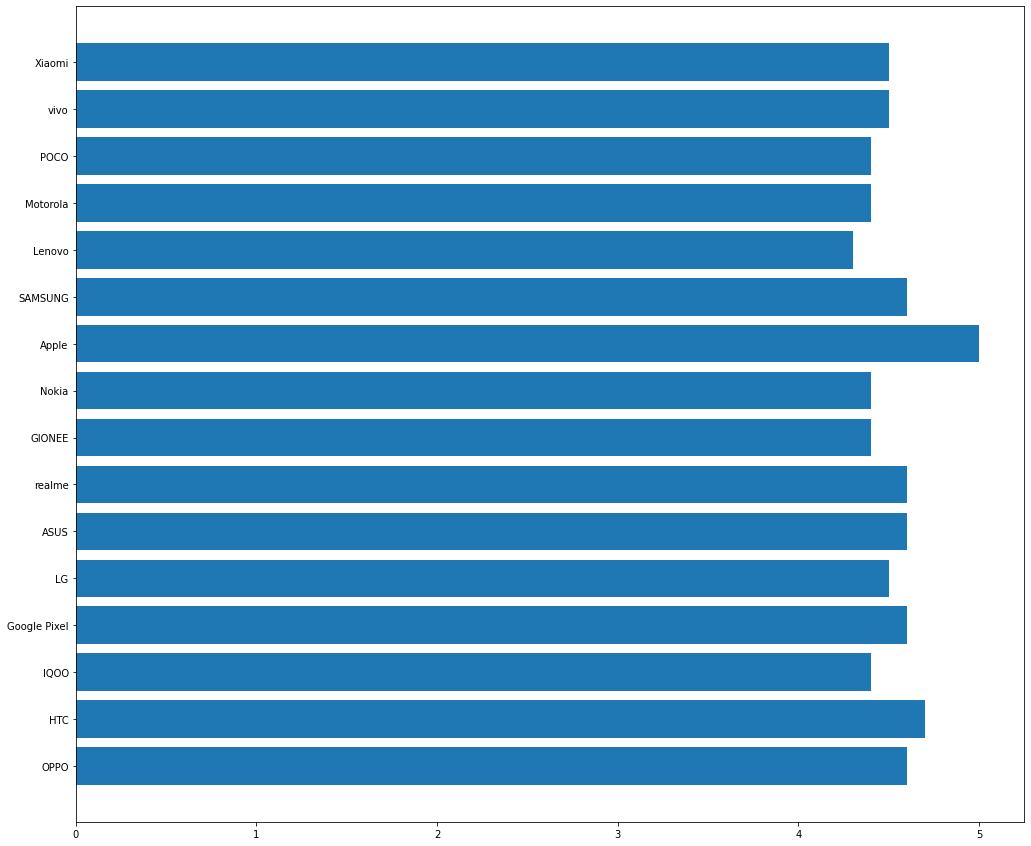

In [ ]:
plt.figure(figsize=(17,15))
x=df['Brand']
y=df['Rating']

#plt.xlabel('Brand')
#plt.ylabel('Rating')
plt.barh(x,y)
plt.show()

In [ ]:
df2 = df.groupby('Brand')[['Selling Price']].mean().sort_values(ascending=False,by='Selling Price')
df2 = df2.reset_index()

In [ ]:
fig = px.bar(df2, x='Brand', y='Selling Price', color = 'Brand', title = 'Average Selling Price of Phones by Brands')
fig.show()

In [ ]:
fig = px.scatter(df, x="Rating", y="Selling Price", color="Brand",title='Relation between Selling price and Ratings')
fig.show()

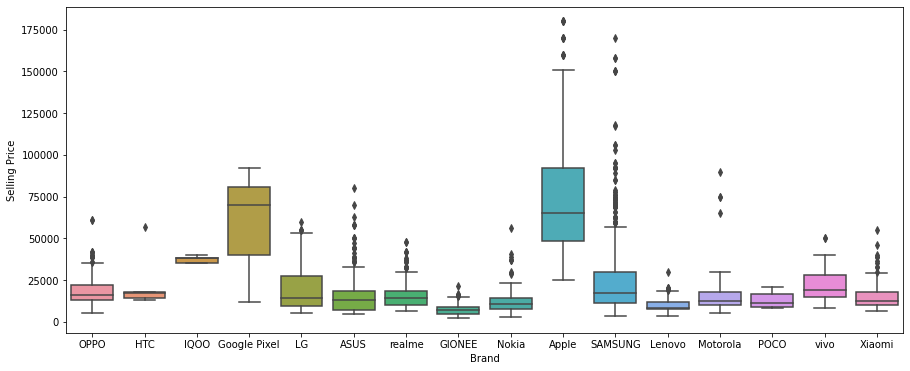

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x="Brand", y="Selling Price", data=df)

In [ ]:
bins = [0,25000,50000, np.inf]
names = ['Budget', 'Mid-range', 'Premium']
df['Segments'] = pd.cut(df['Selling Price'], bins, labels=names)

In [ ]:
df.head(100)

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Segments
1,OPPO,A53,CREAM,4 GB,64 GB,4.5,11990.0,Budget
2,OPPO,A53,BLACK,6 GB,128 GB,4.3,13990.0,Budget
3,OPPO,A53,CREAM,6 GB,128 GB,4.3,13990.0,Budget
4,OPPO,A53,BLACK,4 GB,64 GB,4.5,11990.0,Budget
5,OPPO,A53,BLACK,6 GB,128 GB,4.3,13990.0,Budget
...,...,...,...,...,...,...,...,...
96,OPPO,A5 2020,WHITE,3 GB,64 GB,4.4,12990.0,Budget
97,OPPO,F3 Deepika Padukone Limited Edition,GOLD,4 GB,64 GB,4.3,17000.0,Budget
98,OPPO,F1 Plus,GOLD,4 GB,64 GB,4.0,27500.0,Mid-range
99,OPPO,K1,BLACK,4 GB,64 GB,4.4,15000.0,Budget


In [ ]:
df3 = df.groupby(['Segments']).count().reset_index()
df3


,Segments,Brand,Model,Color,Memory,Storage,Rating,Selling Price
0,Budget,1706,1706,1706,1706,1706,1706,1706
1,Mid-range,379,379,379,379,379,379,379
2,Premium,350,350,350,350,350,350,350


In [ ]:
fig = px.pie(df3, values='Model', names='Segments', title='Phones available by Segments')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout (title_x=0.47)
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



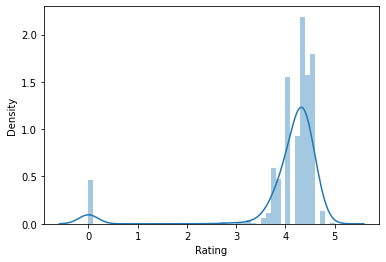

In [ ]:
sns.distplot(df['Rating'])
plt.show()

In [ ]:
fig = px.box(df, x= 'Brand', y='Selling Price',title = 'Selling Price range by Brands', color='Brand')
fig.show()

In [ ]:
!pip install labelbox

     |████████████████████████████████| 150 kB 4.9 MB/s 
     |████████████████████████████████| 10.9 MB 38.3 MB/s 


NameError: ignored

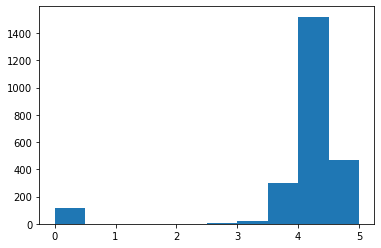

In [ ]:
plt.hist(df['Rating'])

plt.show()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,2435.0,4.039343,0.935173,0.0,4.0,4.3,4.4,5.0
Selling Price,2435.0,27303.652567,29147.577116,2290.0,9999.0,15990.0,30945.0,179900.0


In [ ]:
def find_outliers(col, df):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]

find_outliers("Selling Price", df).shape

(273, 7)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<function matplotlib.pyplot.show>

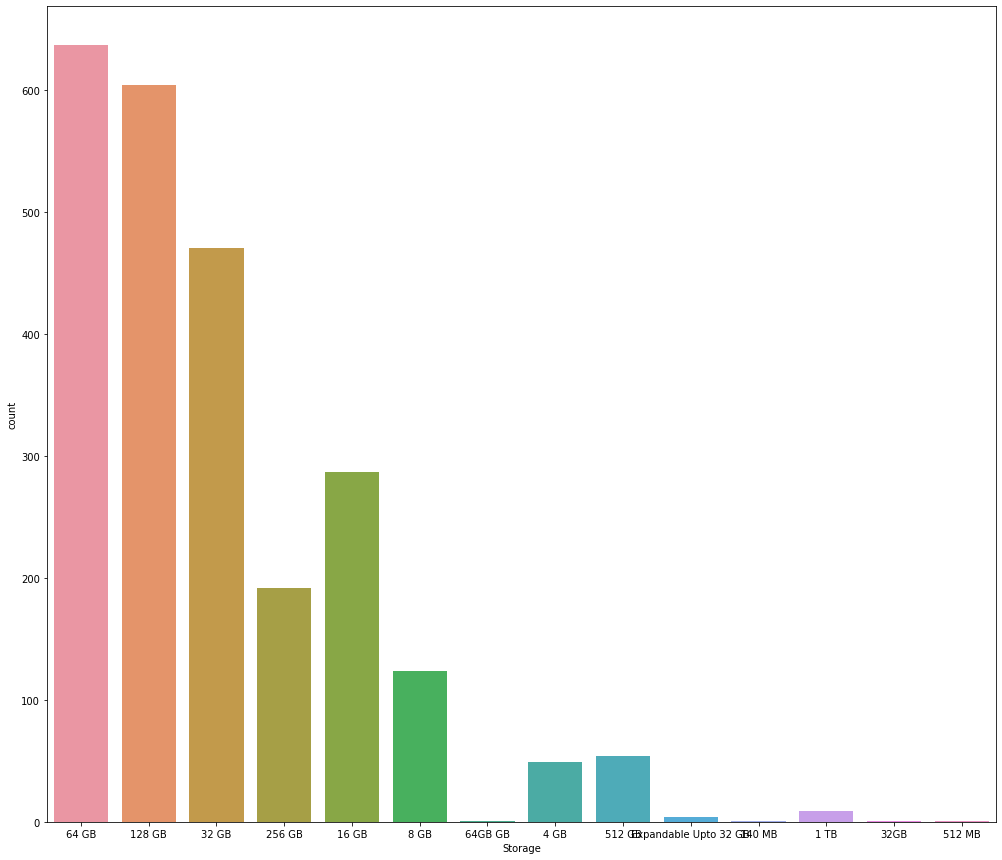

In [ ]:
plt.figure(figsize=(17,15))
sns.countplot(df.Storage)
plt.show

In [ ]:
top_rated_ten_phones = df.sort_values(by=["Rating"], ascending=False)[:15]

top_rated_ten_phones

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Segments
1253,Apple,iPhone 7 Plus,RED,3 GB,256 GB,5.0,85400.0,Premium
1349,Apple,iPhone 7 Plus,RED,3 GB,256 GB,5.0,85400.0,Premium
1261,Apple,iPhone XS,GREY,4 GB,64 GB,4.7,62999.0,Premium
1230,Apple,iPhone XS,GREY,4 GB,512 GB,4.7,134900.0,Premium
1332,Apple,iPhone 11 Pro Max,SILVER,4GB,64 GB,4.7,117100.0,Premium
1184,Apple,iPhone 11 Pro Max,GREEN,4GB,64 GB,4.7,117100.0,Premium
1243,Apple,iPhone 11 Pro Max,GOLD,4GB,256 GB,4.7,131900.0,Premium
1385,Apple,iPhone 11 Pro Max,GREEN,4GB,512 GB,4.7,150800.0,Premium
1356,Apple,iPhone XS,GREY,4 GB,256 GB,4.7,76999.0,Premium
1357,Apple,iPhone XS,GREY,4 GB,64 GB,4.7,62999.0,Premium


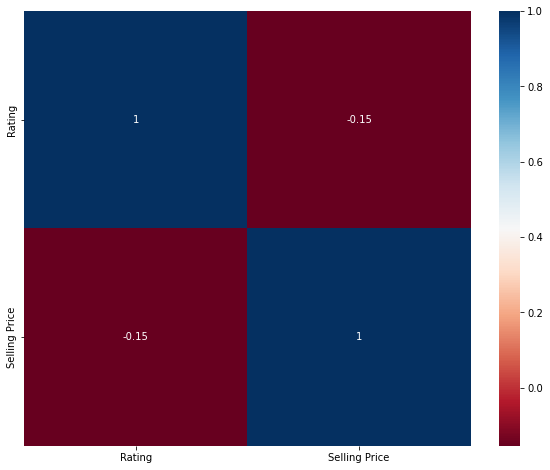

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

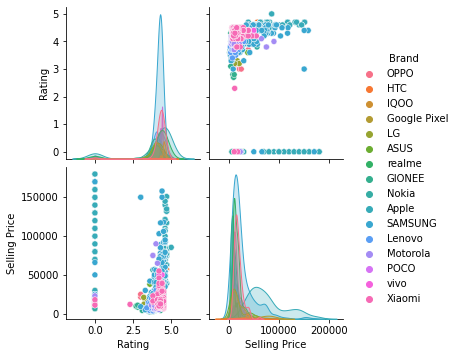

In [ ]:
sns.pairplot(df, hue='Brand')

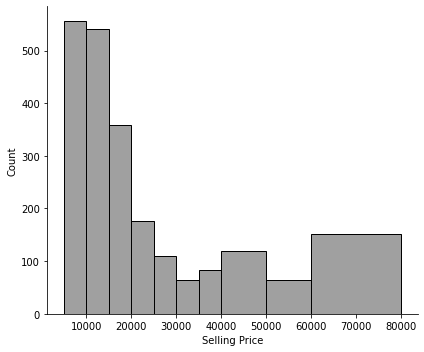

In [ ]:
sns.displot(df, x='Selling Price',bins=[5000,10000,15000,20000,25000,30000,35000,40000,50000,60000,80000], aspect=1.2,color='grey')